In [85]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn
from urllib import unquote_plus


from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from IPython.core.display import display
from collections import Counter

pd.options.display.max_colwidth = 300

In [86]:
# mapping for artist_idx values to artist names
artist_names = {}
with open('../GenreModeling/data/vocab_idx') as fin:
    for line in fin:
        line = line.strip().split()
        artist_names[int(line[1])] = line[0]

In [87]:
# load some example patch (from me!)
df = pd.read_pickle('../testData/patches/5759068_patches_patch_idx_shuffle.pkl').reset_index()

# we'll have to match this to some raw data so we can manually examine the aritsts in different patches
df_raw = pd.read_pickle('../testData/scrobbles_processed/5759068.pkl')
df_raw['artist_name'] = df_raw['artist_idx'].apply(lambda x: artist_names.get(x))

# just add in the artist names here
df['artists'] = df_raw.groupby('patch_idx_shuffle').apply(lambda df: [artist_names.get(idx,'?') for idx in df['artist_idx']])



print "{} total patches".format(len(df))
df.head()
# remove patches with NaNs in feature centroids
df = df[df['centroid'].apply(lambda arr: ~np.any(np.isnan(arr))).values]
print "{} total patches with well-defined centroids".format(len(df))

4045 total patches
4025 total patches with well-defined centroids


In [88]:
# Extract just pathces meeting the MPL criterion and with diveristy of 0.2 or less
clust_data = df[(df['n']>=5)&(df['diversity']<=0.2)].reset_index()
print "{} patches to be clustered".format(len(clust_data))


# Generate an array of the centroids of all these patches for clustering 
a = np.vstack(clust_data['centroid'])


2626 patches to be clustered


In [89]:
# "complete" linkage seems to make the most sense for us here. 
# From https://stats.stackexchange.com/questions/195446/choosing-the-right-linkage-method-for-hierarchical-clustering : 
"""Method of complete linkage or farthest neighbour. Proximity between two clusters is the proximity between their two most distant objects. 
This value is one of values of the input matrix. The metaphor of this built of cluster is circle (in the sense, by hobby or plot)."""

Z = linkage(a, 'complete')
#c, coph_dists = cophenet(Z, pdist(a,metric='cosine'))
#print c



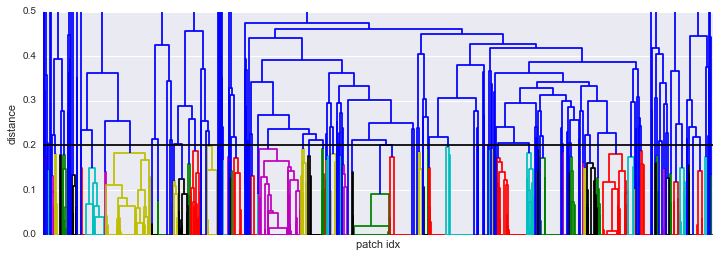

In [107]:
# Now draw the dendrogram
fig,ax =plt.subplots(1,1,figsize=(12, 4))
#ax.set_title('Hierarchical Clustering Dendrogram')
ax.set_xlabel('patch idx')
ax.set_ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
    color_threshold=0.2,
    no_labels=True,

);
ax.set_ylim(0,0.5)
ax.axhline(0.2,c='k');


In [106]:
# Now generate the actual flat clustering using a distance threshold of 0.2

clusters = fcluster(Z,t=0.2,criterion='distance')
print "Total unique patch clusters identified: {}".format(max(clusters))

Total unique patch clusters identified: 164


In [103]:
# Print out each of the clusters we've identified
print total clusters 
for cluster in xrange(1,clusters.max()+1):
    current = clust_data.iloc[np.where(clusters==cluster)[0]][['diversity','artists','index','start_ts']]
    current['artists'] = current['artists'].apply(lambda x: ["{} ({})".format(unquote_plus(name.encode('ascii')),cnt)
        for name,cnt in sorted([(name,cnt) for name,cnt in Counter(x).iteritems()],key=lambda t: t[1],reverse=True)])
    display(current)
    


,diversity,artists,index,start_ts
2263,0.0,[abc diabolo (11)],3543,2011-12-11 05:17:27
2378,0.0,[abc diabolo (18)],3698,2012-02-20 01:06:32


,diversity,artists,index,start_ts
943,0.0,[doom (14)],1573,2009-03-31 19:56:40


,diversity,artists,index,start_ts
387,0.0,[josé mercé (10)],651,2008-04-14 10:53:00


,diversity,artists,index,start_ts
389,0.0,[el barrio (6)],653,2008-04-14 14:10:05


,diversity,artists,index,start_ts
39,0.0,[control machete (5)],70,2007-05-05 19:52:08
103,0.0,[control machete (16)],187,2007-08-30 12:47:11
128,0.0,[molotov (11)],234,2007-09-28 19:42:05
236,0.0,[control machete (6)],419,2008-02-05 00:24:27
264,0.0,[control machete (9)],464,2008-02-11 17:42:51
488,0.0,[control machete (9)],821,2008-06-01 18:31:10
782,0.0,[molotov (35)],1306,2008-11-14 00:11:40
1659,0.0,[nortec collective (6)],2686,2010-09-15 14:18:01


,diversity,artists,index,start_ts
189,0.017698,"[café tacvba (11), molotov (8)]",344,2008-01-12 17:32:56
192,0.000000,[café tacvba (20)],349,2008-01-14 22:21:19
227,0.018421,"[café tacvba (6), café tacuba (3)]",408,2008-02-03 22:27:03
246,0.010526,"[café tacvba (6), café tacuba (1)]",435,2008-02-07 09:39:32
247,0.014328,"[café tacvba (7), café tacuba (2)]",437,2008-02-07 10:10:35
266,0.000000,[café tacvba (15)],467,2008-02-11 22:22:24
283,0.017193,"[café tacvba (7), café tacuba (3)]",492,2008-02-20 20:13:24
313,0.015072,"[café tacvba (9), café tacuba (3)]",537,2008-03-04 09:30:33
531,0.008570,"[café tacvba (14), vicentico (1)]",891,2008-06-30 21:34:54
536,0.059053,"[café tacvba (5), café tacuba (3), bersuit vergarabat (1)]",901,2008-07-01 23:54:26


,diversity,artists,index,start_ts
678,0.0,[ely guerra (6)],1141,2008-10-09 07:00:37


,diversity,artists,index,start_ts
427,0.107436,"[? (5), ludwig van beethoven (4), wolfgang amadeus mozart (3), johann sebastian bach (2), frédéric chopin (2), erik satie (1), evgeny kissin (1), arcangelo corelli (1), trio mediaeval (1), françois-joël thiollier (1)]",714,2008-05-02 20:49:56
428,0.057562,"[johann sebastian bach (2), ludwig van beethoven (2), ralph vaughan williams (1), capella istropolitana (1)]",715,2008-05-02 23:22:44
432,0.000000,[ludwig van beethoven (7)],721,2008-05-04 14:03:46
443,0.000000,[ludwig van beethoven (12)],740,2008-05-08 22:13:01
732,0.103136,"[yo-yo ma (4), antonio vivaldi (3)]",1228,2008-10-30 02:27:43
826,0.009061,"[frédéric chopin (5), ludwig van beethoven (5), evgeny kissin (1)]",1371,2008-12-11 22:05:53
1007,0.002868,"[frédéric chopin (6), evgeny kissin (1)]",1675,2009-05-08 07:36:06
1509,0.000000,[itzhak perlman (18)],2451,2010-05-28 03:32:42
1540,0.004015,"[frédéric chopin (4), evgeny kissin (1)]",2502,2010-06-19 07:56:19
2042,0.000000,[ludwig van beethoven (9)],3220,2011-06-06 02:26:12


,diversity,artists,index,start_ts
987,0.096879,"[evgeny kissin (3), erik satie (1), capella istropolitana (1)]",1646,2009-05-03 06:33:52
1216,0.077244,"[ralph vaughan williams (2), arcangelo corelli (1), johann sebastian bach (1), capella istropolitana (1)]",2005,2009-11-05 11:14:32
1227,0.095337,"[arcangelo corelli (2), capella istropolitana (2), ralph vaughan williams (2), johann sebastian bach (1)]",2022,2009-11-10 11:43:50
1689,0.000000,[johann sebastian bach (12)],2727,2010-10-01 03:15:38
1691,0.000000,[johann sebastian bach (27)],2730,2010-10-01 21:00:47
1693,0.000000,[johann sebastian bach (63)],2733,2010-10-02 20:20:41
1699,0.000000,[johann sebastian bach (76)],2740,2010-10-05 22:33:37
1701,0.000127,"[johann sebastian bach (106), franz schubert (1)]",2744,2010-10-06 19:46:46
1706,0.000000,[johann sebastian bach (25)],2751,2010-10-08 18:53:26
1717,0.000000,[johann sebastian bach (27)],2767,2010-10-16 20:44:24


,diversity,artists,index,start_ts
2296,0.000000,[arvo pärt (13)],3585,2011-12-28 09:49:37
2298,0.000000,[arvo pärt (21)],3587,2011-12-30 02:03:16
2303,0.000000,[arvo pärt (7)],3594,2012-01-04 04:32:11
2307,0.000000,[arvo pärt (18)],3598,2012-01-10 02:46:46
2310,0.000000,[arvo pärt (7)],3602,2012-01-11 22:05:43
2315,0.000000,[arvo pärt (14)],3608,2012-01-13 05:01:49
2319,0.000000,[arvo pärt (10)],3613,2012-01-16 05:59:39
2444,0.127543,"[arvo pärt (3), the tallis scholars (2)]",3790,2012-04-03 16:58:50


,diversity,artists,index,start_ts
567,0.000000,[yo-yo ma (16)],958,2008-08-18 08:03:03
643,0.000000,[yo-yo ma (6)],1088,2008-09-27 16:31:21
1202,0.000000,[philip glass (21)],1983,2009-10-29 08:51:48
1207,0.015861,"[philip glass (19), evgeny kissin (1)]",1991,2009-11-03 09:33:36
1211,0.018659,"[philip glass (16), evgeny kissin (1)]",1997,2009-11-04 09:19:57
1215,0.012200,"[philip glass (25), evgeny kissin (1)]",2003,2009-11-05 10:17:46
1226,0.021819,"[philip glass (26), evgeny kissin (2)]",2020,2009-11-10 10:47:04
1229,0.000000,[philip glass (16)],2026,2009-11-11 09:43:03
1234,0.018659,"[philip glass (16), evgeny kissin (1)]",2032,2009-11-16 10:53:45
1240,0.018659,"[philip glass (16), evgeny kissin (1)]",2042,2009-11-23 07:35:57


,diversity,artists,index,start_ts
2133,0.0,[peteris vasks (10)],3342,2011-09-26 23:02:16


,diversity,artists,index,start_ts
1326,0.0,[andrew jackson jihad (7)],2173,2010-01-14 21:50:42
1327,0.0,[andrew jackson jihad (8)],2175,2010-01-15 03:10:52


,diversity,artists,index,start_ts
2531,0.0,[refused (14)],3910,2012-08-19 16:22:57
2533,0.0,[refused (20)],3912,2012-08-20 16:53:43
2535,0.0,[refused (10)],3914,2012-08-21 23:35:36
2548,0.0,[refused (9)],3933,2012-09-05 01:21:22


,diversity,artists,index,start_ts
2560,0.0,[black flag (9)],3950,2012-09-14 19:04:17


,diversity,artists,index,start_ts
883,0.032731,"[propagandhi (1), snuff (1), bracket (1), goober patrol (1), nofx (1)]",1467,2009-02-05 07:46:35
980,0.051851,"[propagandhi (1), snuff (1), swingin' utters (1), the lawrence arms (1), me first and the gimme gimmes (1)]",1636,2009-05-01 04:46:17
1342,0.000000,[descendents (15)],2195,2010-02-02 08:40:20


,diversity,artists,index,start_ts
2025,0.0,[the aquabats (11)],3198,2011-05-25 01:31:48


,diversity,artists,index,start_ts
850,0.0,[chiodos (8)],1410,2009-01-16 00:01:16
860,0.0,[chiodos (16)],1426,2009-01-24 02:58:31
861,0.0,[chiodos (18)],1428,2009-01-24 23:05:37
1414,0.0,[chiodos (9)],2304,2010-03-10 23:33:18
1569,0.0,[chiodos (10)],2550,2010-07-14 20:32:59
1623,0.0,[chiodos (10)],2625,2010-08-14 19:29:33


,diversity,artists,index,start_ts
1066,0.029017,"[emmure (3), all shall perish (2), the acacia strain (2), august burns red (1), as blood runs black (1), parkway drive (1)]",1768,2009-06-03 21:57:58
1067,0.065861,"[august burns red (2), as i lay dying (2), all shall perish (2), the acacia strain (2), my bitter end (1), emmure (1), as blood runs black (1)]",1770,2009-06-03 23:46:18
1069,0.041423,"[emmure (3), the acacia strain (3), all shall perish (2), august burns red (1), as i lay dying (1), as blood runs black (1)]",1774,2009-06-06 00:03:30
1379,0.000000,[august burns red (6)],2252,2010-02-22 06:19:00
1580,0.000000,[as blood runs black (6)],2567,2010-07-18 23:30:44
1646,0.000000,[august burns red (9)],2666,2010-09-02 16:08:36
1720,0.000000,[as blood runs black (11)],2772,2010-10-17 20:49:38
1730,0.011934,"[as blood runs black (7), august burns red (4)]",2785,2010-10-22 16:16:33
1761,0.000000,[august burns red (16)],2832,2010-11-09 01:27:00
1971,0.000000,[as blood runs black (6)],3119,2011-04-11 18:52:13


,diversity,artists,index,start_ts
708,0.000000,[Ленинград (13)],1187,2008-10-20 22:34:33
709,0.000000,[Ленинград (12)],1189,2008-10-21 00:32:47
712,0.000000,[Ленинград (13)],1195,2008-10-21 18:55:54
713,0.000000,[Ленинград (12)],1197,2008-10-21 21:31:52
718,0.000000,[Ленинград (13)],1206,2008-10-23 16:04:45
720,0.001347,"[Ленинград (13), Сергей Шнуров (1)]",1210,2008-10-24 20:01:26
779,0.000000,[Ленинград (13)],1301,2008-11-12 16:41:50
867,0.000000,[Ленинград (13)],1438,2009-01-28 00:16:48
868,0.000000,[Ленинград (13)],1440,2009-01-28 04:16:19
893,0.000000,[Ленинград (14)],1485,2009-02-11 18:37:05


,diversity,artists,index,start_ts
1428,0.0,[everything is made in china (10)],2327,2010-03-23 08:28:30


,diversity,artists,index,start_ts
379,0.000000,[eluvium (8)],637,2008-03-29 23:11:20
381,0.000000,[eluvium (24)],640,2008-03-30 16:27:44
388,0.000000,[eluvium (8)],652,2008-04-14 11:33:51
391,0.000000,[eluvium (12)],656,2008-04-14 20:28:35
408,0.000000,[eluvium (7)],686,2008-04-22 15:26:31
423,0.000000,[eluvium (10)],707,2008-04-28 21:32:18
456,0.000000,[eluvium (6)],762,2008-05-15 00:22:52
469,0.000000,[eluvium (22)],786,2008-05-24 16:12:29
472,0.000000,[eluvium (9)],791,2008-05-25 23:12:43
480,0.039518,"[eluvium (7), yndi halda (2)]",806,2008-05-29 01:13:11


,diversity,artists,index,start_ts
517,0.000000,[Ólafur arnalds (8)],873,2008-06-26 10:36:50
519,0.000000,[Ólafur arnalds (8)],875,2008-06-26 12:31:42
522,0.000000,[Ólafur arnalds (8)],879,2008-06-26 18:06:40
525,0.000000,[Ólafur arnalds (5)],882,2008-06-26 22:35:18
526,0.000000,[Ólafur arnalds (8)],884,2008-06-28 23:51:29
540,0.000000,[Ólafur arnalds (8)],908,2008-07-06 09:15:33
561,0.000000,[Ólafur arnalds (8)],948,2008-08-06 07:45:23
578,0.000000,[Ólafur arnalds (12)],977,2008-08-27 16:43:41
595,0.000000,[Ólafur arnalds (8)],1005,2008-09-02 20:43:46
603,0.000000,[Ólafur arnalds (6)],1016,2008-09-06 06:26:43


,diversity,artists,index,start_ts
112,0.000000,[set fire to flames (6)],202,2007-09-07 12:59:02
225,0.000000,[fly pan am (5)],405,2008-02-03 00:35:18
719,0.045278,"[set fire to flames (6), mono (1)]",1208,2008-10-24 06:29:59


,diversity,artists,index,start_ts
10,0.000000,[a silver mt. zion (15)],18,2007-03-07 02:53:08
13,0.000000,[mogwai (7)],23,2007-03-09 08:32:57
15,0.000000,[mogwai (6)],27,2007-03-13 04:07:08
19,0.000000,[explosions in the sky (8)],35,2007-03-21 04:59:47
21,0.000000,[mogwai (10)],38,2007-04-05 01:53:37
29,0.000000,[do make say think (7)],51,2007-04-16 05:41:44
44,0.047389,"[a silver mt. zion (15), mogwai (11), godspeed you! black emperor (8)]",78,2007-05-09 08:05:55
48,0.019447,"[mogwai (12), godspeed you! black emperor (2)]",83,2007-05-14 19:46:13
99,0.044242,"[mogwai (3), godspeed you! black emperor (2)]",180,2007-08-27 17:18:13
106,0.000000,[godspeed you! black emperor (6)],193,2007-09-03 14:26:35


,diversity,artists,index,start_ts
2145,0.0,[richard skelton (7)],3361,2011-10-11 19:00:12


,diversity,artists,index,start_ts
1139,0.000000,[the dillinger escape plan (13)],1888,2009-09-05 22:46:15
1141,0.000000,[the dillinger escape plan (11)],1891,2009-09-06 07:25:38
1146,0.000000,[the dillinger escape plan (12)],1897,2009-09-09 19:36:13
1382,0.000000,[the dillinger escape plan (6)],2256,2010-02-24 03:45:34
1408,0.000000,[the dillinger escape plan (13)],2293,2010-03-08 19:32:11
1553,0.000000,[the dillinger escape plan (7)],2522,2010-06-28 00:53:28
1563,0.000000,[the dillinger escape plan (10)],2541,2010-07-09 00:29:47
1567,0.000000,[the dillinger escape plan (6)],2547,2010-07-13 23:45:30
1584,0.000000,[the dillinger escape plan (13)],2574,2010-07-31 20:01:27
1597,0.000000,[the dillinger escape plan (23)],2592,2010-08-04 15:04:36


,diversity,artists,index,start_ts
1091,0.000000,[protest the hero (19)],1812,2009-07-08 18:29:11
1092,0.000000,[protest the hero (33)],1814,2009-07-13 02:39:54
1098,0.000000,[protest the hero (17)],1824,2009-07-18 19:01:17
1104,0.000000,[protest the hero (5)],1835,2009-07-24 19:49:12
1112,0.000000,[protest the hero (19)],1846,2009-07-30 21:08:21
1144,0.073864,"[protest the hero (24), the dillinger escape plan (13)]",1895,2009-09-08 22:30:21
1439,0.000000,[protest the hero (6)],2345,2010-04-02 07:11:17
1496,0.000000,[protest the hero (7)],2433,2010-05-21 01:43:26
1574,0.000000,[protest the hero (5)],2558,2010-07-17 02:07:10
1609,0.000000,[protest the hero (14)],2607,2010-08-08 22:36:22


,diversity,artists,index,start_ts
1236,0.0,[helms alee (27)],2035,2009-11-16 21:30:46
1239,0.0,[helms alee (9)],2040,2009-11-23 00:38:19
1242,0.0,[helms alee (6)],2045,2009-11-23 17:09:29
1483,0.0,[helms alee (10)],2412,2010-05-07 02:41:24
1734,0.0,[helms alee (8)],2791,2010-10-24 20:02:39
2051,0.0,[helms alee (9)],3234,2011-06-11 21:14:43
2060,0.0,[helms alee (18)],3246,2011-06-23 19:27:10
2063,0.0,[helms alee (7)],3250,2011-06-26 21:23:39
2065,0.0,[helms alee (13)],3253,2011-06-28 20:47:52
2272,0.0,[helms alee (13)],3554,2011-12-15 17:57:50


,diversity,artists,index,start_ts
1214,0.0,[young widows (8)],2002,2009-11-05 06:36:42
1219,0.0,[young widows (14)],2009,2009-11-05 21:46:57
1223,0.0,[young widows (18)],2015,2009-11-07 06:21:43
1224,0.0,[young widows (12)],2017,2009-11-08 18:51:36
1231,0.0,[young widows (19)],2029,2009-11-13 00:40:25
1237,0.0,[young widows (11)],2036,2009-11-19 03:45:29
1497,0.0,[young widows (7)],2434,2010-05-21 03:41:54
2233,0.0,[young widows (20)],3497,2011-11-17 19:52:40
2584,0.0,[young widows (6)],3984,2012-10-16 22:53:37


,diversity,artists,index,start_ts
2257,0.0,[botch (13)],3534,2011-12-07 00:45:10
2259,0.0,[botch (13)],3538,2011-12-07 23:15:49


,diversity,artists,index,start_ts
256,0.000000,[red sparowes (7)],454,2008-02-10 14:42:56
258,0.026755,"[65daysofstatic (12), red sparowes (7)]",456,2008-02-10 17:06:33
285,0.028972,"[red sparowes (10), god is an astronaut (4)]",495,2008-02-22 01:31:11
418,0.000000,[red sparowes (15)],700,2008-04-26 17:01:22
487,0.000000,[red sparowes (6)],819,2008-06-01 14:40:03
511,0.000000,[red sparowes (15)],864,2008-06-24 13:40:29
549,0.000000,[red sparowes (6)],924,2008-07-15 08:28:01
574,0.198431,"[red sparowes (4), do make say think (1)]",970,2008-08-24 05:51:48
597,0.000000,[red sparowes (13)],1007,2008-09-03 04:14:39
661,0.000000,[red sparowes (6)],1115,2008-10-05 04:15:36


,diversity,artists,index,start_ts
203,0.000000,[god is an astronaut (5)],369,2008-01-26 22:20:01
209,0.000000,[god is an astronaut (11)],378,2008-01-29 11:08:48
245,0.040051,"[65daysofstatic (19), godspeed you! black emperor (3)]",433,2008-02-06 20:42:57
248,0.000000,[65daysofstatic (20)],438,2008-02-07 10:56:48
249,0.000000,[65daysofstatic (20)],440,2008-02-07 13:17:25
259,0.000000,[65daysofstatic (14)],458,2008-02-10 19:47:58
263,0.000000,[65daysofstatic (11)],463,2008-02-11 15:53:49
272,0.000000,[65daysofstatic (21)],476,2008-02-12 17:10:24
290,0.082810,"[explosions in the sky (10), 65daysofstatic (8)]",502,2008-02-25 00:29:56
295,0.000000,[65daysofstatic (6)],510,2008-02-27 16:06:25


,diversity,artists,index,start_ts
985,0.030714,"[the evpatoria report (4), 65daysofstatic (1)]",1643,2009-05-02 21:59:10
990,0.000000,[the evpatoria report (6)],1651,2009-05-03 15:21:51
1151,0.042487,"[the pirate ship quintet (6), caspian (3), gifts from enola (2), godspeed you! black emperor (1)]",1903,2009-09-11 07:40:38
1159,0.000000,[the evpatoria report (10)],1916,2009-09-19 07:23:19
1283,0.018576,"[gifts from enola (9), red sparowes (5)]",2111,2009-12-23 06:23:12
1289,0.000000,[gifts from enola (6)],2119,2009-12-25 01:00:25
1329,0.000000,[the pirate ship quintet (7)],2178,2010-01-23 19:29:15
1351,0.000000,[pg.lost (5)],2208,2010-02-06 19:49:42
1358,0.000000,[pg.lost (5)],2219,2010-02-09 21:20:02
1669,0.067294,"[red sparowes (11), the ascent of everest (10)]",2700,2010-09-21 00:36:47


,diversity,artists,index,start_ts
478,0.000000,[yndi halda (6)],802,2008-05-27 14:47:16
482,0.040236,"[a silver mt. zion (8), yndi halda (5)]",810,2008-05-29 17:35:48
483,0.036615,"[a silver mt. zion (7), yndi halda (3)]",812,2008-05-30 00:42:26
513,0.023569,"[a silver mt. zion (19), yndi halda (4)]",866,2008-06-24 20:14:16
631,0.090902,"[yndi halda (4), god is an astronaut (1), godspeed you! black emperor (1)]",1067,2008-09-19 08:20:38
635,0.025858,"[gregor samsa (5), this will destroy you (5)]",1074,2008-09-23 06:40:52
818,0.000000,[this will destroy you (11)],1360,2008-12-08 07:13:23
819,0.090103,"[this will destroy you (13), gregor samsa (9), russian circles (7)]",1362,2008-12-08 22:54:02
833,0.047817,"[this will destroy you (6), gregor samsa (2), godspeed you! black emperor (2)]",1381,2008-12-15 07:40:02
835,0.000000,[gregor samsa (8)],1384,2008-12-17 06:52:36


,diversity,artists,index,start_ts
2456,0.0,[earth (6)],3806,2012-04-14 23:49:31
2461,0.0,[earth (7)],3812,2012-04-16 16:35:16


,diversity,artists,index,start_ts
666,0.0,[crippled black phoenix (12)],1124,2008-10-06 05:47:28
673,0.0,[crippled black phoenix (9)],1133,2008-10-08 04:32:46
680,0.0,[crippled black phoenix (8)],1144,2008-10-09 21:49:04
822,0.0,[crippled black phoenix (12)],1366,2008-12-10 07:36:29
984,0.0,[crippled black phoenix (12)],1642,2009-05-02 18:18:28
991,0.0,[crippled black phoenix (12)],1652,2009-05-04 07:11:09
1001,0.0,[crippled black phoenix (12)],1666,2009-05-07 05:26:50
1006,0.0,[crippled black phoenix (12)],1673,2009-05-08 02:13:46
1163,0.0,[crippled black phoenix (12)],1922,2009-09-26 09:21:56
1173,0.0,[crippled black phoenix (10)],1939,2009-10-02 05:12:10


,diversity,artists,index,start_ts
609,0.004752,"[russian circles (6), red sparowes (1)]",1028,2008-09-09 04:49:57
610,0.000000,[russian circles (12)],1030,2008-09-09 21:46:47
612,0.000000,[russian circles (12)],1034,2008-09-11 03:24:30
634,0.000000,[russian circles (13)],1072,2008-09-23 04:32:51
658,0.000000,[russian circles (8)],1112,2008-10-03 16:18:15
707,0.000000,[russian circles (6)],1185,2008-10-20 16:57:10
751,0.000000,[russian circles (12)],1256,2008-11-03 06:54:22
785,0.000000,[russian circles (6)],1311,2008-11-18 02:38:54
828,0.000000,[russian circles (10)],1373,2008-12-12 00:22:20
877,0.000000,[russian circles (8)],1456,2009-02-02 06:12:04


,diversity,artists,index,start_ts
2057,0.0,[neurosis (8)],3242,2011-06-18 17:28:48


,diversity,artists,index,start_ts
98,0.0,[bob marley & the wailers (8)],179,2007-08-27 16:42:41
475,0.0,[ska cubano (7)],796,2008-05-27 12:02:31
476,0.0,[ska cubano (12)],798,2008-05-27 12:59:22
675,0.0,[bob marley & the wailers (9)],1136,2008-10-08 17:37:22
2024,0.0,[ska cubano (8)],3197,2011-05-25 01:01:50
2375,0.0,[bob marley & the wailers (16)],3694,2012-02-17 18:45:33


,diversity,artists,index,start_ts
1051,0.0,[charlie parker (12)],1745,2009-05-26 02:22:20
1757,0.0,[john coltrane (10)],2828,2010-11-08 18:04:51
1759,0.0,[john coltrane (6)],2830,2010-11-08 23:02:22
2525,0.0,[miles davis (33)],3904,2012-08-03 15:26:34


,diversity,artists,index,start_ts
717,0.0,[django reinhardt (13)],1205,2008-10-23 06:12:49


,diversity,artists,index,start_ts
2179,0.0,[curtis mayfield (7)],3413,2011-10-22 14:46:55


,diversity,artists,index,start_ts
2434,0.0,[bear in heaven (10)],3777,2012-03-26 22:29:09
2458,0.0,[suuns (7)],3808,2012-04-15 01:52:16


,diversity,artists,index,start_ts
2388,0.0,[big black delta (9)],3715,2012-02-25 00:12:40


,diversity,artists,index,start_ts
458,0.0,[six organs of admittance (20)],766,2008-05-16 19:45:51
461,0.0,[six organs of admittance (16)],771,2008-05-17 19:51:22
502,0.0,[six organs of admittance (16)],848,2008-06-08 19:38:03
507,0.0,[six organs of admittance (12)],857,2008-06-21 15:11:13
523,0.0,[six organs of admittance (12)],880,2008-06-26 21:03:04
527,0.0,[six organs of admittance (14)],885,2008-06-29 00:34:04
563,0.0,[six organs of admittance (16)],952,2008-08-14 00:03:15
664,0.0,[six organs of admittance (16)],1121,2008-10-06 01:48:13
774,0.0,[six organs of admittance (16)],1292,2008-11-08 22:10:35
884,0.0,[six organs of admittance (12)],1469,2009-02-07 05:04:51


,diversity,artists,index,start_ts
1641,0.0,[tyondai braxton (7)],2656,2010-08-26 20:48:46


,diversity,artists,index,start_ts
1980,0.0,[edward artemiev (16)],3130,2011-04-16 18:45:03


,diversity,artists,index,start_ts
460,0.0,[king crimson (6)],770,2008-05-17 18:00:45
1022,0.0,[porcupine tree (9)],1698,2009-05-13 19:42:01
2479,0.0,[king crimson (5)],3838,2012-05-21 00:12:32


,diversity,artists,index,start_ts
1673,0.0,[the appleseed cast (16)],2706,2010-09-23 20:17:24
1797,0.0,[the appleseed cast (13)],2888,2010-11-29 16:16:04
1950,0.0,[the appleseed cast (12)],3094,2011-03-29 20:36:33


,diversity,artists,index,start_ts
1087,0.0,[el grupo nuevo de omar rodriguez lopez (10)],1805,2009-07-05 19:10:13
1088,0.0,[omar a. rodriguez-lopez (27)],1807,2009-07-07 01:14:26
1356,0.0,[omar a. rodriguez-lopez (8)],2216,2010-02-09 01:27:12
1746,0.0,[omar a. rodriguez-lopez (19)],2811,2010-11-01 22:53:30


,diversity,artists,index,start_ts
1119,0.0,[the sound of animals fighting (13)],1858,2009-08-15 02:02:02
1138,0.0,[the sound of animals fighting (7)],1887,2009-09-05 22:01:34
1194,0.0,[the sound of animals fighting (12)],1971,2009-10-22 02:22:52
1297,0.0,[the sound of animals fighting (5)],2130,2009-12-29 04:43:26
1298,0.0,[the sound of animals fighting (6)],2132,2009-12-29 05:29:30
1302,0.0,[the sound of animals fighting (6)],2138,2009-12-31 23:27:59
1304,0.0,[the sound of animals fighting (6)],2141,2010-01-01 00:55:06
1305,0.0,[the sound of animals fighting (18)],2143,2010-01-01 04:05:38
1410,0.0,[the sound of animals fighting (6)],2296,2010-03-08 23:46:36
1856,0.0,[the fall of troy (6)],2965,2011-01-08 19:38:20


,diversity,artists,index,start_ts
1,0.000000,[at the drive-in (13)],2,2007-02-26 09:01:11
5,0.012615,"[at the drive-in (13), sparta (1)]",9,2007-03-02 04:17:48
6,0.000000,[at the drive-in (9)],11,2007-03-02 05:11:01
25,0.000000,[at the drive-in (7)],44,2007-04-13 06:29:14
31,0.000000,[at the drive-in (5)],54,2007-04-16 18:36:08
59,0.000000,[at the drive-in (6)],105,2007-05-28 17:46:47
230,0.000000,[at the drive-in (19)],412,2008-02-04 13:27:36
253,0.000000,[at the drive-in (31)],448,2008-02-09 09:41:03
315,0.000000,[at the drive-in (8)],539,2008-03-04 12:23:07
450,0.000000,[at the drive-in (11)],750,2008-05-12 16:51:37


,diversity,artists,index,start_ts
2556,0.085520,"[emmylou harris, alison krauss & gillian welch (1), alison krauss & gillian welch (1), the whites (1), the cox family (1), the peasall sisters (1)]",3946,2012-09-12 20:02:59
2557,0.167695,"[the soggy bottom boys (2), john hartford (2), the stanley brothers (1), ralph stanley (1), the fairfield four (1)]",3947,2012-09-12 20:17:19


,diversity,artists,index,start_ts
1127,0.0,[steve miller band (10)],1870,2009-08-23 17:20:07


,diversity,artists,index,start_ts
2207,0.0,[todd rundgren (5)],3457,2011-11-04 00:53:50


,diversity,artists,index,start_ts
2171,0.0,[jackson c. frank (18)],3399,2011-10-20 20:07:37
2254,0.0,[jackson c. frank (21)],3529,2011-12-02 23:36:22
2381,0.0,[jackson c. frank (13)],3703,2012-02-21 18:21:23
2382,0.0,[jackson c. frank (27)],3705,2012-02-21 23:20:40
2571,0.0,[jackson c. frank (10)],3968,2012-09-29 18:19:34


,diversity,artists,index,start_ts
2238,0.0,[donovan (10)],3504,2011-11-20 17:45:12
2241,0.0,[donovan (18)],3509,2011-11-25 17:31:37
2244,0.0,[donovan (15)],3513,2011-11-26 04:16:50
2249,0.0,[donovan (19)],3521,2011-11-30 17:07:30
2613,0.0,[donovan (17)],4027,2012-12-06 00:22:18


,diversity,artists,index,start_ts
2008,0.0,[the iguanas (6)],3171,2011-05-03 03:51:33


,diversity,artists,index,start_ts
37,0.0,[seu jorge (8)],66,2007-05-01 05:47:46
532,0.0,[seu jorge (27)],893,2008-06-30 23:09:49
566,0.0,[seu jorge (12)],956,2008-08-16 22:35:40


,diversity,artists,index,start_ts
1445,0.0,[blue roses (20)],2354,2010-04-06 19:57:55
1456,0.0,[blue roses (10)],2369,2010-04-14 08:27:58
1466,0.0,[blue roses (10)],2383,2010-04-21 09:32:24
1477,0.0,[blue roses (10)],2401,2010-05-02 06:55:20
1501,0.0,[blue roses (10)],2441,2010-05-26 08:13:57
1808,0.0,[blue roses (9)],2904,2010-12-04 20:19:13


,diversity,artists,index,start_ts
660,0.0,[port o'brien (11)],1114,2008-10-05 02:37:33
667,0.0,[port o'brien (11)],1125,2008-10-06 16:29:22
672,0.0,[port o'brien (6)],1132,2008-10-08 04:13:31
677,0.0,[port o'brien (11)],1139,2008-10-09 05:56:19
681,0.0,[port o'brien (11)],1146,2008-10-11 19:18:37
696,0.0,[port o'brien (10)],1169,2008-10-16 16:10:03
721,0.0,[port o'brien (9)],1211,2008-10-24 20:41:05
752,0.0,[port o'brien (7)],1258,2008-11-03 17:40:12
763,0.0,[port o'brien (8)],1275,2008-11-05 16:12:11
981,0.0,[port o'brien (11)],1638,2009-05-01 05:31:07


,diversity,artists,index,start_ts
1383,0.0,[the boy least likely to (7)],2257,2010-02-24 09:10:08
2422,0.0,[the blow (5)],3760,2012-03-13 04:11:55
2423,0.0,[the blow (5)],3762,2012-03-13 04:26:15
2443,0.0,[the blow (9)],3789,2012-04-03 04:34:34


,diversity,artists,index,start_ts
12,0.008333,"[modest mouse (15), the shins (1)]",21,2007-03-07 23:32:54
17,0.000000,[modest mouse (14)],31,2007-03-19 19:32:59
18,0.015020,"[modest mouse (15), the flaming lips (1)]",33,2007-03-21 03:47:21
40,0.000000,[elliott smith (33)],71,2007-05-05 20:19:29
66,0.000000,[modest mouse (5)],118,2007-06-25 05:09:19
80,0.000000,[arcade fire (5)],144,2007-07-25 07:17:45
81,0.000000,[beck (13)],146,2007-07-26 05:38:44
110,0.000000,[modest mouse (16)],198,2007-09-04 18:43:06
131,0.000000,[beck (6)],239,2007-09-29 23:15:53
160,0.000000,[josé gonzález (11)],291,2007-11-15 10:48:00


,diversity,artists,index,start_ts
23,0.000000,[architecture in helsinki (12)],41,2007-04-05 05:32:59
74,0.000000,[the decemberists (5)],134,2007-07-16 03:45:02
215,0.000000,[architecture in helsinki (6)],389,2008-01-30 17:23:39
306,0.000000,[the decemberists (10)],528,2008-03-01 16:09:23
363,0.000000,[the decemberists (23)],610,2008-03-15 12:19:49
576,0.000000,[architecture in helsinki (11)],973,2008-08-25 07:42:36
744,0.000000,[the decemberists (14)],1246,2008-11-02 00:56:44
807,0.044964,"[sufjan stevens (16), beirut (5)]",1345,2008-12-01 21:57:02
866,0.000000,[andrew bird (8)],1436,2009-01-27 16:37:09
940,0.000000,[the decemberists (18)],1568,2009-03-22 04:14:16


,diversity,artists,index,start_ts
334,0.0,[ratatat (13)],567,2008-03-07 16:11:34
501,0.0,[ratatat (12)],846,2008-06-08 16:43:50
503,0.0,[ratatat (17)],850,2008-06-09 06:42:54
505,0.0,[ratatat (9)],853,2008-06-20 10:08:53
506,0.0,[ratatat (9)],855,2008-06-21 09:21:53
514,0.0,[ratatat (6)],868,2008-06-25 08:51:59
530,0.0,[ratatat (9)],889,2008-06-30 19:27:26
550,0.0,[ratatat (14)],926,2008-07-16 02:19:01
555,0.0,[the faint (7)],936,2008-07-28 20:58:21
586,0.0,[girl talk (28)],992,2008-09-01 00:52:50


,diversity,artists,index,start_ts
254,0.000000,[bright eyes (8)],450,2008-02-09 16:24:01
862,0.000000,[death cab for cutie (13)],1430,2009-01-26 02:56:45
880,0.000000,[tokyo police club (23)],1462,2009-02-04 01:47:17
1293,0.000000,[karen o and the kids (7)],2125,2009-12-26 21:48:43
1415,0.000000,[edward sharpe & the magnetic zeros (23)],2305,2010-03-11 09:41:47
1416,0.000000,[edward sharpe & the magnetic zeros (14)],2307,2010-03-12 02:13:16
1419,0.000000,[edward sharpe & the magnetic zeros (15)],2311,2010-03-14 09:39:11
1492,0.000000,[broken bells (10)],2427,2010-05-19 23:17:30
1510,0.000000,[karen o and the kids (14)],2453,2010-05-29 05:39:57
1527,0.044614,"[edward sharpe & the magnetic zeros (5), the shins (1)]",2481,2010-06-08 18:26:27


,diversity,artists,index,start_ts
257,0.0,[junior boys (5)],455,2008-02-10 16:41:48
260,0.0,[junior boys (5)],460,2008-02-11 09:12:52
1336,0.0,[hot chip (5)],2188,2010-01-29 03:09:45
1340,0.0,[hot chip (14)],2192,2010-01-29 21:28:24
1353,0.0,[the whitest boy alive (9)],2211,2010-02-07 16:46:59


,diversity,artists,index,start_ts
307,0.0,[the avalanches (17)],530,2008-03-03 00:09:10
1461,0.0,[charlotte gainsbourg (8)],2376,2010-04-16 05:14:20
1534,0.0,[charlotte gainsbourg (7)],2492,2010-06-16 00:55:09
1544,0.0,[charlotte gainsbourg (14)],2508,2010-06-23 06:28:12
1783,0.0,[charlotte gainsbourg (14)],2862,2010-11-18 00:56:01
1846,0.0,[charlotte gainsbourg (12)],2954,2010-12-30 14:09:48
1923,0.0,[charlotte gainsbourg (14)],3056,2011-03-05 19:13:58
2026,0.0,[charlotte gainsbourg (7)],3200,2011-05-25 02:22:47
2334,0.0,[charlotte gainsbourg (14)],3636,2012-01-28 00:54:32


,diversity,artists,index,start_ts
2034,0.0,[the drums (5)],3212,2011-06-01 21:28:03
2041,0.0,[the drums (11)],3219,2011-06-06 01:17:22


,diversity,artists,index,start_ts
100,0.000000,[animal collective (6)],182,2007-08-27 20:14:38
633,0.000000,[caribou (13)],1071,2008-09-23 00:51:38
1100,0.000000,[dirty projectors (10)],1828,2009-07-20 18:50:55
1105,0.000000,[dirty projectors (10)],1837,2009-07-25 02:22:16
1106,0.000000,[dirty projectors (11)],1839,2009-07-25 04:09:44
1115,0.000000,[grizzly bear (5)],1851,2009-08-06 00:58:40
1118,0.000000,[dirty projectors (16)],1857,2009-08-15 01:19:36
1133,0.000000,[dirty projectors (6)],1880,2009-09-01 21:21:02
1143,0.000000,[dirty projectors (9)],1893,2009-09-06 17:46:24
1149,0.000000,[grizzly bear (11)],1901,2009-09-10 16:10:35


,diversity,artists,index,start_ts
748,0.0,[the sea and cake (11)],1251,2008-11-02 06:59:16
1018,0.0,[the sea and cake (12)],1690,2009-05-12 03:23:36


,diversity,artists,index,start_ts
1536,0.0,[battles (13)],2495,2010-06-17 07:03:44
1543,0.0,[battles (8)],2506,2010-06-22 01:45:51
1548,0.0,[battles (9)],2515,2010-06-26 21:32:50
1552,0.0,[battles (5)],2520,2010-06-27 18:45:23
1631,0.0,[battles (14)],2638,2010-08-18 18:10:01
1794,0.0,[the octopus project (33)],2882,2010-11-24 18:22:43


,diversity,artists,index,start_ts
2572,0.0,[dungen (18)],3969,2012-09-29 22:59:42


,diversity,artists,index,start_ts
904,0.0,[...and you will know us by the trail of dead (24)],1502,2009-02-19 06:58:13
948,0.0,[...and you will know us by the trail of dead (6)],1582,2009-04-05 00:34:07
1517,0.0,[...and you will know us by the trail of dead (5)],2464,2010-06-03 22:32:48
1611,0.0,[...and you will know us by the trail of dead (7)],2609,2010-08-09 15:06:36


,diversity,artists,index,start_ts
685,0.0,[the streets (11)],1153,2008-10-13 07:07:27
686,0.0,[the streets (15)],1155,2008-10-13 20:32:10
747,0.0,[saul williams (5)],1250,2008-11-02 06:39:42
864,0.0,[saul williams (9)],1433,2009-01-26 16:03:02
1396,0.0,[gnarls barkley (18)],2273,2010-03-02 20:20:42
2018,0.0,[saul williams (18)],3186,2011-05-15 15:22:55
2070,0.0,[danger mouse (7)],3260,2011-07-14 23:46:08


,diversity,artists,index,start_ts
728,0.0,[david bowie (5)],1223,2008-10-29 01:10:21
742,0.0,[pixies (31)],1243,2008-11-01 20:44:39
876,0.0,[talking heads (21)],1454,2009-02-02 03:24:47
1053,0.0,[pixies (11)],1748,2009-05-26 20:29:04
1117,0.0,[violent femmes (6)],1855,2009-08-09 23:41:22
1152,0.0,[pixies (9)],1904,2009-09-11 23:44:38
1418,0.0,[pixies (17)],2309,2010-03-12 21:17:23
1520,0.0,[pixies (6)],2469,2010-06-05 17:47:08
1774,0.0,[pixies (38)],2849,2010-11-13 18:40:39
1991,0.0,[pixies (23)],3146,2011-04-24 18:01:11


,diversity,artists,index,start_ts
2140,0.0,[david byrne (5)],3354,2011-10-08 16:39:56


,diversity,artists,index,start_ts
1180,0.0,[kaada (40)],1949,2009-10-09 05:26:28
1181,0.0,[kaada (16)],1951,2009-10-11 09:03:23
1183,0.0,[kaada (17)],1954,2009-10-12 07:36:26
1292,0.0,[kaada (13)],2124,2009-12-26 10:45:33
1295,0.0,[kaada (13)],2128,2009-12-28 09:30:35
1300,0.0,[kaada (13)],2134,2009-12-29 09:54:05
1306,0.0,[kaada (24)],2145,2010-01-01 19:49:00
1309,0.0,[kaada (13)],2149,2010-01-02 09:55:58
1310,0.0,[kaada (7)],2151,2010-01-02 18:15:56
1319,0.0,[kaada (13)],2164,2010-01-07 11:38:40


,diversity,artists,index,start_ts
1443,0.085446,"[jónsi (20), sigur rós (11)]",2352,2010-04-06 06:16:28
1499,0.000000,[jónsi (9)],2438,2010-05-25 00:01:41
1749,0.000000,[jónsi (9)],2815,2010-11-03 23:18:05
1768,0.000000,[philip selway (11)],2842,2010-11-12 20:40:39
1773,0.000000,[philip selway (22)],2848,2010-11-13 16:58:44
1776,0.000000,[philip selway (11)],2851,2010-11-13 21:51:56
2127,0.000000,[philip selway (40)],3333,2011-09-18 22:17:13
2618,0.000000,[philip selway (18)],4033,2012-12-13 21:23:35


,diversity,artists,index,start_ts
109,0.000000,[sigur rós (6)],197,2007-09-04 15:48:44
124,0.000000,[sigur rós (31)],226,2007-09-26 16:50:34
145,0.000000,[sigur rós (10)],265,2007-10-09 21:52:05
156,0.096460,"[sigur rós (18), explosions in the sky (13)]",285,2007-10-21 11:14:34
159,0.000000,[sigur rós (9)],289,2007-10-23 20:48:16
173,0.000000,[sigur rós (11)],315,2007-12-01 16:49:25
180,0.000000,[sigur rós (9)],329,2008-01-03 13:04:17
188,0.000000,[sigur rós (10)],343,2008-01-12 15:03:49
190,0.000000,[sigur rós (9)],345,2008-01-13 13:00:29
191,0.000000,[sigur rós (9)],347,2008-01-13 14:11:05


,diversity,artists,index,start_ts
296,0.0,[jonny greenwood (22)],511,2008-02-27 18:59:25
298,0.0,[jonny greenwood (5)],514,2008-02-28 16:13:53
319,0.0,[jonny greenwood (11)],544,2008-03-04 23:19:34
320,0.0,[nick cave & warren ellis (17)],546,2008-03-05 00:14:29
322,0.0,[nick cave & warren ellis (30)],549,2008-03-05 16:26:14
324,0.0,[nick cave & warren ellis (22)],552,2008-03-05 22:51:50
329,0.0,[nick cave & warren ellis (14)],559,2008-03-06 20:30:17
331,0.0,[nick cave & warren ellis (16)],562,2008-03-07 00:23:05
336,0.0,[nick cave & warren ellis (9)],571,2008-03-08 00:54:40
339,0.0,[nick cave & warren ellis (28)],574,2008-03-08 16:16:34


,diversity,artists,index,start_ts
910,0.0,[mugison (13)],1514,2009-03-01 20:33:46
927,0.0,[mugison (13)],1544,2009-03-13 00:53:42
1102,0.0,[mugison (12)],1831,2009-07-21 20:29:12
1407,0.0,[mugison (13)],2291,2010-03-08 07:03:43
1526,0.0,[mugison (11)],2479,2010-06-08 06:25:51
1630,0.0,[mugison (13)],2636,2010-08-18 01:50:55
1633,0.0,[mugison (25)],2640,2010-08-18 22:49:50
1696,0.0,[mugison (10)],2736,2010-10-03 22:28:29
1743,0.0,[mugison (13)],2806,2010-10-30 21:35:12
2513,0.0,[mugison (7)],3887,2012-06-28 01:05:53


,diversity,artists,index,start_ts
1186,0.0,[soulsavers (5)],1959,2009-10-15 03:58:11
1188,0.0,[soulsavers (34)],1962,2009-10-17 16:15:26
1303,0.0,[soulsavers (10)],2140,2010-01-01 00:06:38
1570,0.0,[soulsavers (34)],2552,2010-07-14 23:33:32
1874,0.0,[soulsavers (23)],2989,2011-01-23 03:35:02
1890,0.0,[soulsavers (15)],3010,2011-02-04 03:09:58
2210,0.0,[soulsavers (8)],3461,2011-11-04 21:14:03
2326,0.0,[soulsavers (7)],3623,2012-01-22 05:15:25
2328,0.0,[soulsavers (11)],3625,2012-01-23 23:15:40
2570,0.0,[soulsavers (5)],3967,2012-09-28 19:59:55


,diversity,artists,index,start_ts
27,0.096609,"[lewis black (6), pablo francisco (4)]",48,2007-04-15 02:25:48
89,0.000000,[mitch hedberg (16)],161,2007-08-12 06:17:59
94,0.000000,[mitch hedberg (22)],171,2007-08-21 20:12:10
96,0.000000,[mitch hedberg (6)],175,2007-08-26 21:07:27
132,0.000000,[lewis black (10)],241,2007-09-30 18:16:32
161,0.000000,[mitch hedberg (11)],293,2007-11-18 01:37:35
250,0.000000,[lewis black (16)],442,2008-02-08 13:10:08
638,0.000000,[mitch hedberg (15)],1079,2008-09-25 08:02:17
1029,0.000000,[mitch hedberg (13)],1710,2009-05-16 08:17:44
1034,0.000000,[mitch hedberg (42)],1718,2009-05-17 07:27:00


,diversity,artists,index,start_ts
67,0.0,[pablo francisco (9)],120,2007-07-12 02:42:36


,diversity,artists,index,start_ts
252,0.000000,[rjd2 (6)],446,2008-02-08 20:29:51
370,0.000000,[rjd2 (6)],622,2008-03-24 19:49:19
382,0.000000,[rjd2 (24)],642,2008-04-08 12:39:42
394,0.000000,[rjd2 (25)],662,2008-04-16 17:55:25
455,0.000000,[rjd2 (7)],760,2008-05-13 18:49:49
465,0.000000,[rjd2 (14)],779,2008-05-20 21:21:56
484,0.000000,[rjd2 (6)],814,2008-05-31 18:38:02
485,0.000000,[rjd2 (5)],816,2008-05-31 19:01:27
491,0.000000,[rjd2 (8)],827,2008-06-02 13:51:56
579,0.000000,[rjd2 (12)],979,2008-08-28 06:03:43


,diversity,artists,index,start_ts
606,0.0,[cypress hill (10)],1022,2008-09-08 18:25:30
974,0.0,[outkast (41)],1627,2009-04-28 09:10:42


,diversity,artists,index,start_ts
1253,0.0,[aqua teen hunger force (8)],2062,2009-12-08 20:57:53


,diversity,artists,index,start_ts
2,0.000000,[tool (8)],4,2007-02-27 04:25:49
20,0.000000,[tool (9)],37,2007-04-04 23:24:51
32,0.000000,[tool (12)],56,2007-04-17 06:05:23
33,0.063942,"[tool (7), alice in chains (2)]",58,2007-04-23 00:56:46
61,0.000000,[tool (8)],108,2007-06-07 21:32:55
108,0.000000,"[tool (4), ? (2)]",196,2007-09-04 13:25:46
127,0.000000,[tool (5)],232,2007-09-28 08:49:32
170,0.000000,[tool (7)],310,2007-11-26 23:26:04
206,0.000000,[tool (8)],374,2008-01-27 23:58:02
213,0.000000,[tool (19)],385,2008-01-29 16:55:10


,diversity,artists,index,start_ts
0,0.0,[the mars volta (16)],1,2007-02-26 07:07:20
150,0.0,[the mars volta (14)],275,2007-10-14 11:45:26
181,0.0,[the mars volta (9)],330,2008-01-03 14:11:13
187,0.0,[the mars volta (13)],341,2008-01-08 12:49:21
196,0.0,[the mars volta (26)],357,2008-01-20 18:25:46
204,0.0,[the mars volta (35)],370,2008-01-26 22:45:19
216,0.0,[the mars volta (18)],391,2008-01-30 20:55:12
219,0.0,[the mars volta (7)],396,2008-01-31 12:43:26
223,0.0,[the mars volta (17)],401,2008-02-02 09:19:09
226,0.0,[the mars volta (7)],407,2008-02-03 21:44:22


,diversity,artists,index,start_ts
1074,0.0,[mastodon (9)],1782,2009-06-08 19:19:21
1089,0.0,[mastodon (12)],1809,2009-07-07 19:25:42
1137,0.0,[mastodon (6)],1886,2009-09-05 21:35:58
2079,0.0,[mastodon (7)],3272,2011-07-28 00:31:39
2082,0.0,[mastodon (22)],3276,2011-07-29 22:15:42
2318,0.0,[mastodon (26)],3612,2012-01-16 01:45:22
2320,0.0,[mastodon (21)],3614,2012-01-16 21:49:08
2337,0.0,[mastodon (12)],3640,2012-01-29 03:00:23
2338,0.0,[mastodon (41)],3642,2012-01-29 23:55:11
2360,0.0,[mastodon (5)],3671,2012-02-10 22:29:47


,diversity,artists,index,start_ts
2472,0.0,[dethklok (49)],3828,2012-05-02 15:18:59
2473,0.0,[dethklok (7)],3830,2012-05-10 17:01:47
2475,0.0,[dethklok (34)],3832,2012-05-14 16:37:02
2476,0.0,[dethklok (24)],3834,2012-05-17 00:08:38
2478,0.0,[dethklok (24)],3837,2012-05-17 19:17:49
2480,0.0,[dethklok (13)],3839,2012-05-21 02:00:44
2482,0.0,[dethklok (25)],3842,2012-05-21 19:34:58
2486,0.0,[dethklok (15)],3848,2012-05-25 15:26:08
2495,0.0,[dethklok (10)],3860,2012-05-30 01:59:52
2497,0.0,[dethklok (13)],3863,2012-06-01 01:03:30


,diversity,artists,index,start_ts
2317,0.0,[strapping young lad (65)],3611,2012-01-14 21:31:02


,diversity,artists,index,start_ts
1270,0.0,[buckethead (13)],2089,2009-12-15 01:00:07


,diversity,artists,index,start_ts
1480,0.0,[in this moment (11)],2406,2010-05-04 19:48:33
1487,0.0,[in this moment (9)],2418,2010-05-12 01:46:23


,diversity,artists,index,start_ts
1196,0.0,[austrian death machine (26)],1975,2009-10-25 06:28:21
1198,0.0,[austrian death machine (27)],1977,2009-10-26 04:26:16
1200,0.0,[austrian death machine (16)],1979,2009-10-27 05:05:13
1203,0.0,[austrian death machine (11)],1984,2009-10-29 19:12:41
1206,0.0,[austrian death machine (40)],1990,2009-11-03 06:48:21
1451,0.0,[austrian death machine (7)],2364,2010-04-13 01:43:55
1453,0.0,[austrian death machine (6)],2366,2010-04-13 09:10:46
1455,0.0,[austrian death machine (20)],2368,2010-04-14 07:49:47
1459,0.0,[austrian death machine (7)],2373,2010-04-15 00:28:18
1568,0.0,[austrian death machine (16)],2548,2010-07-14 01:21:12


,diversity,artists,index,start_ts
2390,0.0,[amon amarth (10)],3718,2012-02-25 17:47:37


,diversity,artists,index,start_ts
1201,0.0,[afi (8)],1981,2009-10-29 03:10:16
1464,0.0,[afi (12)],2380,2010-04-20 19:21:14


,diversity,artists,index,start_ts
823,0.0,[shiny toy guns (6)],1368,2008-12-11 06:43:54
891,0.0,[panic! at the disco (7)],1481,2009-02-10 22:35:44
898,0.0,[coheed and cambria (8)],1493,2009-02-17 02:49:52
900,0.0,[coheed and cambria (8)],1495,2009-02-17 04:24:44
1065,0.0,[coheed and cambria (6)],1767,2009-06-03 19:59:53
1872,0.0,[coheed and cambria (28)],2986,2011-01-22 00:25:38
2007,0.0,[coheed and cambria (10)],3169,2011-05-02 04:08:18


,diversity,artists,index,start_ts
1140,0.0,[lacuna coil (13)],1890,2009-09-06 06:23:08
1153,0.0,[lacuna coil (6)],1905,2009-09-12 00:12:40
1276,0.0,[lacuna coil (8)],2100,2009-12-17 00:26:09


,diversity,artists,index,start_ts
229,0.0,[chevelle (7)],410,2008-02-04 12:43:13
302,0.0,[chevelle (8)],520,2008-02-29 00:47:24
471,0.0,[chevelle (16)],790,2008-05-25 19:19:26
746,0.0,[skindred (12)],1248,2008-11-02 04:06:53
922,0.0,[skindred (10)],1535,2009-03-09 04:02:00
1090,0.0,[flyleaf (6)],1811,2009-07-08 04:49:32
1225,0.0,[flyleaf (11)],2019,2009-11-10 07:43:14
1250,0.0,[flyleaf (14)],2058,2009-12-07 20:28:47
1450,0.0,[chevelle (8)],2363,2010-04-12 22:08:56
1613,0.0,[skindred (10)],2612,2010-08-09 21:43:06


,diversity,artists,index,start_ts
281,0.0,[overseer (12)],489,2008-02-20 17:38:44
879,0.0,[overseer (5)],1460,2009-02-03 06:37:43
975,0.0,[overseer (16)],1628,2009-04-28 11:41:29


,diversity,artists,index,start_ts
1265,0.0,[j. ralph (11)],2081,2009-12-13 14:00:00
1266,0.0,[j. ralph (6)],2083,2009-12-14 10:05:59
1279,0.0,[j. ralph (14)],2105,2009-12-19 20:00:32
1313,0.0,[j. ralph (9)],2156,2010-01-05 04:21:37
1634,0.0,[j. ralph (9)],2642,2010-08-19 23:15:52
2052,0.0,[j. ralph (11)],3236,2011-06-12 20:38:02


,diversity,artists,index,start_ts
16,0.000000,[radiohead (13)],29,2007-03-14 03:59:51
22,0.000000,[radiohead (34)],39,2007-04-05 02:50:52
30,0.048444,"[radiohead (7), stereophonics (1)]",52,2007-04-16 06:28:46
38,0.000000,[gorillaz (41)],68,2007-05-04 02:46:21
45,0.000000,[ok go (18)],79,2007-05-11 03:32:58
47,0.000000,[radiohead (8)],81,2007-05-13 06:08:18
60,0.088596,"[radiohead (15), beck (5), pixies (1)]",107,2007-06-06 05:06:47
64,0.000000,[radiohead (6)],114,2007-06-20 01:25:48
65,0.000000,[radiohead (15)],116,2007-06-22 02:53:32
88,0.029048,"[radiohead (12), gorillaz (1)]",159,2007-08-09 05:04:28


,diversity,artists,index,start_ts
133,0.000000,[the kills (12)],243,2007-10-01 17:20:39
137,0.000000,[the kills (6)],251,2007-10-03 10:10:29
626,0.000000,[bloc party (9)],1057,2008-09-17 03:41:22
809,0.000000,[yeah yeah yeahs (33)],1348,2008-12-02 02:08:01
841,0.125481,"[vampire weekend (11), mgmt (9), beirut (3)]",1395,2009-01-11 01:12:04
843,0.081863,"[mgmt (10), vampire weekend (6)]",1398,2009-01-12 02:43:42
845,0.000000,[vampire weekend (10)],1401,2009-01-12 22:13:51
847,0.081863,"[vampire weekend (10), mgmt (6)]",1405,2009-01-14 03:24:33
849,0.037372,"[vampire weekend (21), mgmt (3)]",1408,2009-01-15 07:51:02
851,0.000000,[mgmt (6)],1411,2009-01-16 00:32:09


,diversity,artists,index,start_ts
1465,0.0,[aberdeen city (10)],2381,2010-04-20 20:12:58


,diversity,artists,index,start_ts
24,0.0,[dane cook (5)],42,2007-04-08 09:05:07
92,0.0,[dane cook (17)],167,2007-08-20 00:27:00
165,0.0,[dane cook (8)],300,2007-11-18 23:40:27
1222,0.0,[dane cook (11)],2013,2009-11-06 08:07:51
1514,0.0,[dane cook (57)],2460,2010-06-01 05:37:27


,diversity,artists,index,start_ts
569,0.068641,"[glen hansard (3), glen hansard & markéta irglová (3), marketa irglova (2), interference (1)]",962,2008-08-22 03:16:35
737,0.000000,[damien rice (5)],1235,2008-10-31 00:23:31
1422,0.000000,[damien rice (15)],2317,2010-03-17 08:46:00
1999,0.052335,"[glen hansard (48), glen hansard & markéta irglová (21), marketa irglova (14), interference (7)]",3157,2011-04-28 06:31:25
2005,0.000000,[imogen heap (8)],3166,2011-05-01 17:04:48
2623,0.045380,"[glen hansard (7), glen hansard & markéta irglová (4), interference (1), marketa irglova (1)]",4041,2012-12-27 06:28:31


,diversity,artists,index,start_ts
2226,0.0,[dave matthews band (8)],3486,2011-11-13 21:46:49


,diversity,artists,index,start_ts
963,0.0,[lovage (19)],1607,2009-04-15 08:54:47
982,0.0,[portishead (39)],1639,2009-05-01 06:28:20
989,0.0,[portishead (11)],1650,2009-05-03 08:45:57
1128,0.0,[portishead (8)],1872,2009-08-25 06:46:06
1908,0.0,[bang gang (19)],3036,2011-02-23 21:52:05
2619,0.0,[portishead (23)],4035,2012-12-13 23:22:46


,diversity,artists,index,start_ts
34,0.000000,[nine inch nails (16)],60,2007-04-24 07:03:08
53,0.000000,[nine inch nails (16)],93,2007-05-17 04:10:34
54,0.000000,[nine inch nails (5)],95,2007-05-17 07:55:14
56,0.000000,[nine inch nails (8)],99,2007-05-19 05:58:10
58,0.000000,[nine inch nails (24)],103,2007-05-20 21:45:55
141,0.000000,[nine inch nails (8)],259,2007-10-08 11:41:45
157,0.000000,[nine inch nails (5)],286,2007-10-22 12:24:09
162,0.000000,[nine inch nails (6)],294,2007-11-18 15:09:30
212,0.000000,[nine inch nails (9)],384,2008-01-29 15:43:02
222,0.000000,[nine inch nails (9)],399,2008-01-31 15:25:52


,diversity,artists,index,start_ts
1059,0.0,[depeche mode (14)],1757,2009-05-31 17:53:09


,diversity,artists,index,start_ts
1346,0.0,[the dubliners (9)],2201,2010-02-03 20:49:46
1357,0.0,[the dubliners (24)],2218,2010-02-09 05:48:26


,diversity,artists,index,start_ts
85,0.0,[flogging molly (5)],154,2007-08-03 02:43:53
431,0.0,[flogging molly (21)],719,2008-05-04 11:35:17
535,0.0,[flogging molly (8)],899,2008-07-01 22:40:33
568,0.0,[flogging molly (5)],960,2008-08-18 19:08:02
1516,0.0,[flogging molly (8)],2462,2010-06-02 18:18:43


,diversity,artists,index,start_ts
97,0.0,[johnny cash (26)],177,2007-08-26 21:25:04
650,0.0,[gogol bordello (16)],1099,2008-09-30 08:08:18
651,0.0,[gogol bordello (25)],1101,2008-09-30 20:26:32
654,0.0,[gogol bordello (8)],1105,2008-10-02 00:08:33
684,0.0,[gogol bordello (21)],1151,2008-10-12 15:04:58
692,0.0,[gogol bordello (5)],1162,2008-10-14 21:21:53
703,0.0,[gogol bordello (14)],1179,2008-10-19 02:20:51
733,0.0,[gogol bordello (8)],1230,2008-10-30 19:54:08
765,0.0,[gogol bordello (7)],1277,2008-11-05 21:11:00
848,0.0,[gogol bordello (15)],1407,2009-01-15 02:05:56


,diversity,artists,index,start_ts
1680,0.0,[carter burwell (12)],2717,2010-09-27 21:46:11
1747,0.0,[carter burwell (12)],2812,2010-11-02 17:35:52
1772,0.0,[carter burwell (12)],2847,2010-11-13 00:34:49


,diversity,artists,index,start_ts
735,0.0,[michael jackson (10)],1232,2008-10-30 22:17:28


,diversity,artists,index,start_ts
615,0.0,[rammstein (17)],1038,2008-09-12 04:27:48
1062,0.0,[marilyn manson (6)],1762,2009-06-01 20:59:56
2289,0.0,[marilyn manson (8)],3577,2011-12-23 00:10:18


,diversity,artists,index,start_ts
70,0.000000,[alien ant farm (5)],126,2007-07-15 01:48:36
73,0.000000,[system of a down (33)],132,2007-07-15 20:57:51
177,0.000000,[system of a down (25)],323,2007-12-27 12:58:16
333,0.000000,[serj tankian (17)],566,2008-03-07 13:07:21
492,0.000000,[system of a down (10)],828,2008-06-02 14:29:12
642,0.042155,"[red hot chili peppers (10), rage against the machine (8)]",1086,2008-09-27 02:59:14
644,0.000000,[serj tankian (16)],1090,2008-09-28 04:38:12
724,0.000000,[tenacious d (9)],1216,2008-10-27 20:33:07
1085,0.000000,[scars on broadway (7)],1802,2009-07-04 00:31:42
1086,0.000000,[scars on broadway (15)],1804,2009-07-04 04:27:09


,diversity,artists,index,start_ts
899,0.0,[vitamin string quartet (9)],1494,2009-02-17 03:24:31
901,0.0,[vitamin string quartet (9)],1497,2009-02-17 06:54:57
2367,0.0,[team america (6)],3680,2012-02-13 15:48:55


,diversity,artists,index,start_ts
1109,0.0,[mindless self indulgence (19)],1842,2009-07-29 04:08:24


,diversity,artists,index,start_ts
9,0.0,[manu chao (11)],16,2007-03-05 05:05:17
11,0.0,[manu chao (35)],19,2007-03-07 04:40:12
123,0.0,[manu chao (16)],224,2007-09-25 21:31:04
126,0.0,[manu chao (19)],230,2007-09-27 11:15:58
172,0.0,[manu chao (21)],313,2007-11-27 21:22:46
194,0.0,[manu chao (17)],353,2008-01-19 21:02:07
207,0.0,[manu chao (7)],375,2008-01-28 11:40:54
251,0.0,[manu chao (11)],444,2008-02-08 15:42:48
951,0.0,[manu chao (15)],1587,2009-04-06 05:08:11
1668,0.0,[manu chao (19)],2699,2010-09-20 23:21:30


,diversity,artists,index,start_ts
565,0.0,[sublime (8)],955,2008-08-16 22:13:45
770,0.0,[sublime (6)],1286,2008-11-07 02:29:07
1269,0.0,[311 (6)],2087,2009-12-14 23:55:59
1614,0.0,[sublime (17)],2614,2010-08-10 14:34:09
1898,0.0,[sublime (18)],3019,2011-02-09 04:15:45


,diversity,artists,index,start_ts
268,0.000000,[bob dylan (13)],470,2008-02-12 08:38:45
270,0.000000,[jefferson airplane (11)],473,2008-02-12 13:54:41
274,0.044668,"[bob dylan (7), the beatles (1)]",479,2008-02-13 07:46:31
282,0.000000,[bob dylan (6)],490,2008-02-20 18:37:18
304,0.000000,[jefferson airplane (5)],524,2008-03-01 10:03:11
312,0.000000,[jefferson airplane (12)],536,2008-03-04 00:18:43
542,0.000000,[jefferson airplane (10)],911,2008-07-07 04:01:27
556,0.000000,[jefferson airplane (6)],938,2008-07-31 02:38:48
811,0.000000,[jefferson airplane (11)],1351,2008-12-03 07:22:41
839,0.000000,[jefferson airplane (7)],1391,2009-01-09 00:01:44


,diversity,artists,index,start_ts
135,0.000000,[the beatles (11)],247,2007-10-02 18:06:29
175,0.000000,[the beatles (6)],319,2007-12-18 13:05:01
604,0.000000,[the rolling stones (7)],1018,2008-09-08 03:02:23
607,0.000000,[led zeppelin (21)],1024,2008-09-09 01:17:56
698,0.000000,[pink floyd (5)],1173,2008-10-18 05:19:35
711,0.000000,[the rolling stones (5)],1193,2008-10-21 04:42:21
731,0.000000,[pink floyd (12)],1227,2008-10-30 01:09:01
771,0.000000,[the beatles (6)],1287,2008-11-07 02:51:45
783,0.000000,[the beatles (17)],1308,2008-11-15 04:52:24
789,0.000000,[the beatles (6)],1317,2008-11-19 06:02:59


,diversity,artists,index,start_ts
28,0.106900,"[coldplay (3), the strokes (2)]",50,2007-04-16 00:23:45
35,0.000000,[arctic monkeys (8)],62,2007-04-27 21:49:05
36,0.000000,[arctic monkeys (9)],64,2007-04-27 23:46:35
41,0.037264,"[the strokes (16), coldplay (2)]",73,2007-05-06 05:09:19
42,0.000000,[arctic monkeys (12)],75,2007-05-08 04:11:52
86,0.000000,[arctic monkeys (9)],155,2007-08-03 05:19:36
139,0.063248,"[arctic monkeys (11), muse (5)]",255,2007-10-05 09:54:43
201,0.000000,[arctic monkeys (6)],367,2008-01-26 17:29:27
402,0.000000,[arctic monkeys (25)],677,2008-04-21 12:15:30
439,0.000000,[the last shadow puppets (10)],732,2008-05-07 07:42:15


,diversity,artists,index,start_ts
3,0.000000,[muse (24)],5,2007-02-27 05:19:15
4,0.000000,[muse (11)],7,2007-02-28 01:51:39
8,0.000000,[queens of the stone age (19)],14,2007-03-02 08:32:49
14,0.000000,[queens of the stone age (20)],25,2007-03-12 20:05:49
46,0.000000,[muse (13)],80,2007-05-11 06:43:46
50,0.000000,[muse (15)],87,2007-05-15 04:08:27
52,0.000000,[muse (12)],91,2007-05-16 03:42:01
55,0.000000,[queens of the stone age (9)],97,2007-05-18 02:40:47
57,0.000000,[muse (20)],101,2007-05-19 19:17:47
62,0.000000,[muse (6)],110,2007-06-09 07:44:07


,diversity,artists,index,start_ts
279,0.000000,[nick cave and the bad seeds (7)],486,2008-02-19 00:26:04
328,0.000000,[nick cave and the bad seeds (11)],558,2008-03-06 17:29:43
383,0.000000,[nick cave and the bad seeds (7)],644,2008-04-08 16:01:02
473,0.000000,[joy division (6)],792,2008-05-26 12:38:59
474,0.000000,[joy division (7)],794,2008-05-26 15:19:39
544,0.000000,[nick cave and the bad seeds (16)],915,2008-07-08 05:53:02
760,0.000000,[the cure (15)],1270,2008-11-04 21:50:59
1041,0.014779,"[nick cave and the bad seeds (10), nick cave & the bad seeds (1)]",1729,2009-05-18 22:56:57
2088,0.000000,[joy division (9)],3284,2011-08-09 17:49:25
2090,0.000000,[joy division (22)],3286,2011-08-10 02:54:56


,diversity,artists,index,start_ts
2017,0.0,[sonic youth (20)],3184,2011-05-13 02:52:08
2185,0.0,[dinosaur jr. (5)],3422,2011-10-25 17:51:24


,diversity,artists,index,start_ts
2425,0.013532,"[iggy pop (16), the stooges (1)]",3764,2012-03-16 18:47:09
2440,0.013083,"[iggy & the stooges (3), the stooges (2)]",3785,2012-04-02 00:54:15
2524,0.046008,"[iggy pop (4), the stooges (1)]",3902,2012-08-03 01:53:59
2614,0.019170,"[iggy pop (11), the stooges (1)]",4028,2012-12-06 01:47:36


,diversity,artists,index,start_ts
111,0.0,[chingón (12)],200,2007-09-05 17:46:22
300,0.0,[chingón (7)],517,2008-02-28 22:34:23
314,0.0,[chingón (9)],538,2008-03-04 11:19:00
1468,0.0,[chingón (10)],2386,2010-04-26 21:43:56
1655,0.0,[chingón (12)],2680,2010-09-10 17:05:27
1662,0.0,[chingón (12)],2690,2010-09-16 16:24:30
2420,0.0,[chingón (10)],3757,2012-03-09 17:24:08


,diversity,artists,index,start_ts
371,0.0,[squirrel nut zippers (12)],624,2008-03-25 13:46:00


,diversity,artists,index,start_ts
768,0.0,[paul cantelon (6)],1282,2008-11-06 23:13:36
1307,0.0,[paul cantelon (5)],2147,2010-01-02 08:47:09
1411,0.0,[paul cantelon (6)],2298,2010-03-09 01:24:48


,diversity,artists,index,start_ts
43,0.0,[[unknown] (13)],77,2007-05-09 07:08:22
76,0.0,[rodrigo y gabriela (9)],138,2007-07-20 00:49:14
83,0.0,[rodrigo y gabriela (6)],150,2007-07-31 18:39:03
91,0.0,[rodrigo y gabriela (9)],165,2007-08-15 04:46:38
125,0.0,[rodrigo y gabriela (9)],228,2007-09-27 09:38:22
142,0.0,[rodrigo y gabriela (9)],261,2007-10-08 18:50:55
148,0.0,[rodrigo y gabriela (9)],271,2007-10-12 12:54:24
158,0.0,[rodrigo y gabriela (9)],287,2007-10-22 20:37:21
168,0.0,[buena vista social club (8)],306,2007-11-25 22:49:35
186,0.0,[rodrigo y gabriela (9)],339,2008-01-07 21:11:35


,diversity,artists,index,start_ts
599,0.0,[tosca tango orchestra (11)],1009,2008-09-04 00:45:52


,diversity,artists,index,start_ts
1685,0.0,[revocation (6)],2722,2010-09-29 02:28:56
1690,0.0,[revocation (7)],2729,2010-10-01 18:41:30


,diversity,artists,index,start_ts
2188,0.0,[goatwhore (7)],3427,2011-10-26 22:13:00
2354,0.0,[goatwhore (6)],3664,2012-02-07 00:58:16


,diversity,artists,index,start_ts
1585,0.0,[rusko (11)],2575,2010-08-01 06:05:41
1588,0.0,[rusko (9)],2578,2010-08-01 20:49:08
1603,0.0,[rusko (8)],2600,2010-08-06 03:46:37
1621,0.0,[rusko (8)],2623,2010-08-14 18:28:00
1848,0.0,[rusko (17)],2956,2011-01-02 01:31:59
2466,0.0,[rusko (13)],3819,2012-04-23 22:08:41
2468,0.0,[rusko (6)],3822,2012-04-24 17:15:48
2477,0.0,[rusko (6)],3836,2012-05-17 17:52:44
2488,0.0,[rusko (8)],3850,2012-05-26 20:09:10
2511,0.0,[rusko (16)],3883,2012-06-17 23:42:54


,diversity,artists,index,start_ts
657,0.0,[daedelus (6)],1110,2008-10-03 15:09:44
801,0.0,[daedelus (8)],1334,2008-11-24 17:16:50
1014,0.0,[daedelus (10)],1685,2009-05-11 03:07:29
1506,0.0,[flying lotus (7)],2447,2010-05-27 23:19:55
1573,0.0,[flying lotus (8)],2557,2010-07-17 00:01:28
1575,0.0,[flying lotus (9)],2560,2010-07-17 06:31:30
2150,0.0,[flying lotus (6)],3369,2011-10-13 21:24:08


,diversity,artists,index,start_ts
163,0.0,[aphex twin (6)],296,2007-11-18 19:45:13
539,0.0,[boards of canada (14)],906,2008-07-03 08:51:44
750,0.0,[boards of canada (7)],1255,2008-11-03 05:45:30
873,0.0,[boards of canada (20)],1448,2009-02-01 02:27:03
903,0.0,[aphex twin (20)],1501,2009-02-19 05:41:18
1024,0.0,[boards of canada (28)],1701,2009-05-14 05:01:38
1035,0.0,[aphex twin (9)],1720,2009-05-17 15:24:53
1036,0.0,[boards of canada (6)],1722,2009-05-18 03:54:17
1533,0.0,[aphex twin (40)],2490,2010-06-15 04:52:52
1549,0.0,[amon tobin (9)],2517,2010-06-27 06:11:04


,diversity,artists,index,start_ts
2146,0.0,[skrillex (11)],3363,2011-10-13 16:38:26
2153,0.0,[skrillex (7)],3373,2011-10-14 00:37:08
2157,0.0,[skrillex (16)],3378,2011-10-16 02:32:47
2159,0.0,[skrillex (15)],3381,2011-10-16 15:59:08
2161,0.0,[skrillex (5)],3385,2011-10-17 20:41:43
2166,0.0,[skrillex (6)],3392,2011-10-19 02:19:13
2305,0.0,[skrillex (5)],3596,2012-01-04 23:15:52
2309,0.0,[skrillex (7)],3601,2012-01-11 21:35:30
2432,0.0,[skrillex (5)],3774,2012-03-23 14:54:31
2609,0.0,[skrillex (7)],4021,2012-12-03 19:01:52


,diversity,artists,index,start_ts
2445,0.0,[nero (33)],3791,2012-04-04 17:58:30
2446,0.0,[nero (9)],3793,2012-04-06 20:44:20
2450,0.0,[nero (14)],3797,2012-04-08 17:58:28
2452,0.0,[nero (6)],3799,2012-04-09 01:17:34
2552,0.0,[nero (14)],3940,2012-09-10 15:47:04
2567,0.0,[nero (5)],3962,2012-09-25 23:55:58
2576,0.0,[nero (15)],3975,2012-10-04 23:30:24
2583,0.0,[nero (7)],3982,2012-10-14 20:37:31
2588,0.0,[nero (8)],3990,2012-10-24 23:55:48


,diversity,artists,index,start_ts
1016,0.000000,[justice (15)],1687,2009-05-11 17:04:48
1195,0.000000,[justice (10)],1973,2009-10-24 06:43:08
1232,0.000000,[justice (10)],2030,2009-11-14 18:57:55
1402,0.032183,"[justice (11), daft punk (1)]",2282,2010-03-05 02:25:37
2433,0.000000,[major lazer (13)],3776,2012-03-25 23:00:22
2435,0.000000,[major lazer (16)],3778,2012-03-26 23:58:00
2555,0.000000,[major lazer (13)],3944,2012-09-12 17:28:38


,diversity,artists,index,start_ts
949,0.0,[2 many dj's (30)],1584,2009-04-05 03:20:28
979,0.0,[2 many dj's (6)],1634,2009-04-30 21:22:49


,diversity,artists,index,start_ts
228,0.0,[the chemical brothers (10)],409,2008-02-04 11:49:28
237,0.0,[daft punk (5)],421,2008-02-05 11:49:07
301,0.0,[the chemical brothers (9)],519,2008-02-28 23:52:19
736,0.0,[daft punk (5)],1233,2008-10-30 23:17:05
776,0.0,[daft punk (10)],1295,2008-11-09 07:08:09
993,0.0,[daft punk (14)],1656,2009-05-05 00:13:38
997,0.0,[daft punk (16)],1661,2009-05-05 20:48:08
1661,0.0,[the chemical brothers (6)],2689,2010-09-16 15:47:10
1817,0.0,[daft punk (14)],2918,2010-12-11 05:15:59
1830,0.0,[daft punk (17)],2935,2010-12-18 04:25:53


,diversity,artists,index,start_ts
533,0.0,[ocote soul sounds and adrian quesada (10)],895,2008-07-01 18:48:58


,diversity,artists,index,start_ts
129,0.000000,[lupe fiasco (5)],235,2007-09-28 20:31:02
176,0.000000,[lupe fiasco (14)],321,2007-12-22 16:57:51
761,0.000000,[lupe fiasco (12)],1271,2008-11-04 22:55:26
794,0.000000,[the notorious b.i.g. (8)],1324,2008-11-21 07:45:40
1628,0.000000,[lupe fiasco (9)],2633,2010-08-17 22:18:26
1752,0.000000,[lupe fiasco (5)],2820,2010-11-06 01:36:50
2405,0.000000,[lupe fiasco (9)],3737,2012-03-03 18:31:47
2460,0.000000,[lupe fiasco (11)],3811,2012-04-15 23:06:35
2564,0.000000,[lupe fiasco (7)],3957,2012-09-19 00:16:07
2569,0.000000,[lupe fiasco (5)],3965,2012-09-26 22:57:21


,diversity,artists,index,start_ts
26,0.000000,[dangerdoom (14)],46,2007-04-15 00:32:45
51,0.000000,[dangerdoom (14)],89,2007-05-15 23:14:11
69,0.007519,"[dangerdoom (4), aceyalone (1)]",124,2007-07-15 00:00:34
93,0.000000,[aesop rock (12)],169,2007-08-20 16:58:04
122,0.000000,[aesop rock (5)],222,2007-09-20 17:57:16
130,0.009623,"[dangerdoom (11), aesop rock (2)]",237,2007-09-29 13:47:38
144,0.000000,[dangerdoom (5)],264,2007-10-09 21:37:33
218,0.000000,[aesop rock (5)],394,2008-01-31 10:37:12
239,0.000000,[deltron 3030 (17)],424,2008-02-05 17:06:54
271,0.000000,[aesop rock (18)],475,2008-02-12 14:48:09


,diversity,artists,index,start_ts
341,0.000000,[jedi mind tricks (21)],578,2008-03-08 19:00:48
411,0.016118,"[jedi mind tricks (4), talib kweli (1)]",690,2008-04-22 19:16:32
425,0.000000,[jedi mind tricks (19)],711,2008-04-29 21:02:35
541,0.000000,[jedi mind tricks (27)],910,2008-07-06 22:42:01
553,0.000000,[jedi mind tricks (11)],932,2008-07-20 21:53:49
562,0.000000,[jedi mind tricks (23)],950,2008-08-06 23:11:12
620,0.000000,[wu-tang clan (11)],1048,2008-09-15 21:36:43
690,0.000000,[wu-tang clan (7)],1160,2008-10-14 15:31:06
792,0.124568,"[mos def (1), ol' dirty bastard (1), digable planets (1), wu-tang clan (1), nas (1)]",1321,2008-11-20 06:19:09
802,0.000000,[wu-tang clan (8)],1336,2008-11-25 02:51:40


,diversity,artists,index,start_ts
140,0.0,[antonio pinto (5)],257,2007-10-06 16:39:11
284,0.0,[antonio pinto (6)],493,2008-02-20 23:25:28


,diversity,artists,index,start_ts
240,0.0,[e.s. posthumus (13)],425,2008-02-05 18:04:20
261,0.0,[e.s. posthumus (5)],461,2008-02-11 09:38:24
330,0.0,[e.s. posthumus (13)],560,2008-03-06 23:16:34
1710,0.0,[e.s. posthumus (6)],2757,2010-10-10 22:12:34


,diversity,artists,index,start_ts
117,0.0,[alexandre desplat (17)],212,2007-09-16 19:46:13
164,0.0,[hans zimmer (8)],298,2007-11-18 20:24:29
288,0.0,[alexandre desplat (17)],500,2008-02-24 22:22:23
297,0.0,[javier navarrete (14)],512,2008-02-28 00:30:47
348,0.0,[alexandre desplat (9)],587,2008-03-10 23:22:55
351,0.0,[javier navarrete (7)],591,2008-03-11 19:38:11
697,0.0,[alexandre desplat (11)],1171,2008-10-16 22:37:38
1665,0.0,[hans zimmer (7)],2694,2010-09-18 22:03:31
1667,0.0,[hans zimmer (19)],2698,2010-09-19 23:06:34
1714,0.0,[alexandre desplat (8)],2762,2010-10-14 17:21:06


,diversity,artists,index,start_ts
803,0.0,[johan söderqvist (21)],1338,2008-11-26 23:13:19
852,0.0,[johan söderqvist (21)],1412,2009-01-16 19:03:47
853,0.0,[johan söderqvist (20)],1414,2009-01-17 03:15:16
854,0.0,[johan söderqvist (6)],1416,2009-01-19 06:09:51
855,0.0,[johan söderqvist (21)],1418,2009-01-20 04:45:25
945,0.0,[johan söderqvist (21)],1576,2009-04-01 20:58:32
953,0.0,[johan söderqvist (13)],1591,2009-04-07 22:17:30
1107,0.0,[johan söderqvist (14)],1840,2009-07-25 05:37:35
1110,0.0,[johan söderqvist (28)],1843,2009-07-30 00:07:36
1120,0.0,[johan söderqvist (34)],1860,2009-08-18 02:21:22


,diversity,artists,index,start_ts
49,0.000000,[john murphy (6)],85,2007-05-14 21:48:17
82,0.000000,[john murphy (19)],148,2007-07-28 19:57:25
490,0.000000,[clint mansell (8)],825,2008-06-01 22:53:33
494,0.000000,[john murphy (5)],832,2008-06-02 23:01:07
497,0.000000,[clint mansell (10)],838,2008-06-05 23:05:44
500,0.000000,[clint mansell (9)],844,2008-06-06 16:46:34
520,0.000000,[clint mansell (12)],876,2008-06-26 13:12:32
629,0.000000,[clint mansell (12)],1063,2008-09-18 02:05:16
682,0.032243,"[clint mansell (9), hans zimmer (1)]",1148,2008-10-11 20:52:04
699,0.000000,[clint mansell (11)],1174,2008-10-18 18:20:47


,diversity,artists,index,start_ts
1550,0.0,[normand corbeil (5)],2518,2010-06-27 07:30:00
1554,0.0,[normand corbeil (11)],2523,2010-06-28 08:18:50
1559,0.0,[normand corbeil (5)],2533,2010-07-06 05:27:47
1566,0.0,[bill elm and woody jackson (6)],2545,2010-07-13 01:27:23
1841,0.0,[bill elm and woody jackson (15)],2946,2010-12-24 01:11:11
2172,0.0,[bill elm and woody jackson (16)],3401,2011-10-20 21:24:16
2175,0.0,[bill elm and woody jackson (15)],3406,2011-10-21 15:38:39
2177,0.0,[bill elm and woody jackson (19)],3409,2011-10-21 22:11:06
2201,0.0,[bill elm and woody jackson (12)],3446,2011-10-31 22:33:00
2202,0.0,[bill elm and woody jackson (17)],3448,2011-11-01 14:15:38


,diversity,artists,index,start_ts
2242,0.0,[tomáš dvořák (14)],3511,2011-11-25 21:52:29
2358,0.0,[tomáš dvořák (6)],3669,2012-02-09 18:14:37


,diversity,artists,index,start_ts
1907,0.0,[high skies (5)],3034,2011-02-23 14:26:33


,diversity,artists,index,start_ts
1778,0.0,[subcarpati (30)],2853,2010-11-14 20:26:22


,diversity,artists,index,start_ts
355,0.0,[jovanotti (11)],597,2008-03-12 23:42:25


,diversity,artists,index,start_ts
79,0.0,[curumin (6)],143,2007-07-24 05:29:01
143,0.0,[curumin (7)],263,2007-10-09 20:53:09


,diversity,artists,index,start_ts
7,0.034151,"[caetano veloso (9), antonio carlos jobim & elis regina (6)]",12,2007-03-02 05:44:53


,diversity,artists,index,start_ts
1649,0.0,[hallucinogen (7)],2672,2010-09-06 21:51:23
1651,0.0,[hallucinogen (6)],2675,2010-09-07 15:59:42
1781,0.0,[hallucinogen (12)],2858,2010-11-16 01:16:55


,diversity,artists,index,start_ts
509,0.0,[infected mushroom (10)],860,2008-06-22 15:38:23
538,0.0,[infected mushroom (11)],904,2008-07-02 12:11:07
636,0.0,[infected mushroom (6)],1076,2008-09-24 16:20:20
788,0.0,[juno reactor (6)],1315,2008-11-19 02:38:15
820,0.0,[infected mushroom (7)],1364,2008-12-09 17:37:07
1592,0.0,[infected mushroom (8)],2585,2010-08-02 05:49:14
1604,0.0,[infected mushroom (7)],2601,2010-08-06 04:26:58
1998,0.0,[infected mushroom (11)],3155,2011-04-28 02:51:40
2111,0.0,[infected mushroom (8)],3313,2011-09-09 18:40:37


In [83]:
df_raw[df_raw['patch_idx_shuffle']==714]

,dist,artist_idx,ts,session,patch_idx_shuffle,block,patch_idx_simple,artist_name
11809,0.955579,494.0,2008-05-02 20:49:56,0,714,6310,6029,ludwig+van+beethoven
11810,0.000000,494.0,2008-05-02 20:58:49,0,714,6310,6029,ludwig+van+beethoven
11811,0.030263,7040.0,2008-05-02 21:06:30,0,714,6311,6029,arcangelo+corelli
11812,NaN,NaN,2008-05-02 21:08:27,0,714,6312,6030,None
11813,NaN,40115.0,2008-05-02 21:16:48,0,714,6313,6031,trio+mediaeval
11814,0.536037,370.0,2008-05-02 21:20:52,0,714,6314,6032,wolfgang+amadeus+mozart
11815,0.000000,370.0,2008-05-02 21:24:41,0,714,6314,6032,wolfgang+amadeus+mozart
11816,NaN,NaN,2008-05-02 21:31:20,0,714,6315,6033,None
11817,NaN,499.0,2008-05-02 21:34:48,0,714,6316,6034,fr%c3%a9d%c3%a9ric+chopin
11818,0.013960,494.0,2008-05-02 21:36:54,0,714,6317,6034,ludwig+van+beethoven
